### Linear regression with one variable

1. import the necessary packages
2. load the dataset
3. data visualization
4. cost function
5. compute cost of the data
6. batch gradient descent
7. fit the regression line
8. draw the plot of the cost function by iterations
9. draw the linear regression line 
10. use scikit-learn to perform the process
11. use normal equation to perform the process

### <font color='red'> 1. import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### <font color='red'> 2. load the dataset

In [2]:
path1 = 'ex1data1.txt'
data1 = pd.read_csv(path1,header = None, names = ['population','profit'])
data1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### <font color='red'> 3. data visualization

In [3]:
data1.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Axes: xlabel='population', ylabel='profit'>

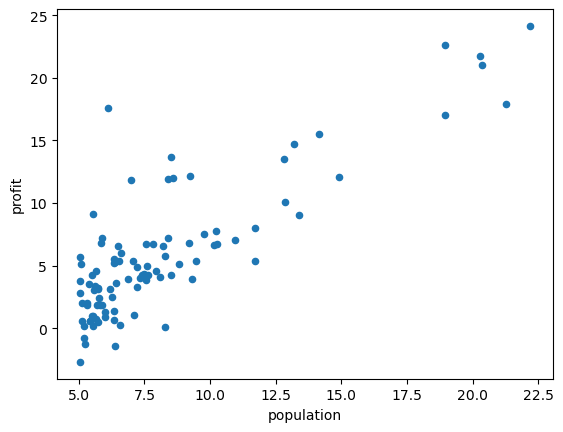

In [4]:
data1.plot(kind = 'scatter',x = 'population',y='profit')


### <font color='red'> 4. cost function

In [5]:
def costFunction(x,y,theta):
    error = x @ theta - y
    inner = np.power(error,2)
    return np.sum(inner)/(2 * len(x))

In [6]:
data1.insert(0,'ones',1)
data1.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


### <font color='red'> 5. compute the cost

In [7]:
x = data1.iloc[:,0:-1]
x.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y = data1.iloc[:,-1]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [9]:
x = x.values
y = y.values
x.shape,y.shape

((97, 2), (97,))

In [10]:
y = y.reshape(97,1)
y.shape

(97, 1)

In [11]:
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [12]:
theta.shape

(2, 1)

In [13]:
costFunction(x,y,theta)

32.072733877455676

### <font color='red'> 6. batch gradient descent

In [14]:
def gradient_descent(x,y,theta,alpha,iters):
    costs = []
    for i in range(iters):
        theta = theta - alpha * x.T @ (x @ theta - y) / len(x)
        cost = costFunction(x,y,theta)
        costs.append(cost)

        if i % 100 == 0:
           print(cost)
    return theta,costs

### <font color='red'> 7. fit the regression line


In [15]:
alpha = 0.02
iters = 2000

In [16]:
theta,costs = gradient_descent(x,y,theta,alpha,iters)

16.769642371667462
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403548
4.5155489085988645
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414092
4.478013190619409
4.477477295755764
4.477217057705424
4.477090682463859
4.477029312876824
4.476999510945953
4.476985038710982
4.476978010791016
4.476974597934661
4.476972940603823


In [17]:
theta

array([[-3.8928815 ],
       [ 1.19274237]])

### <font color='red'> 8. draw the plot of the cost function by iterations


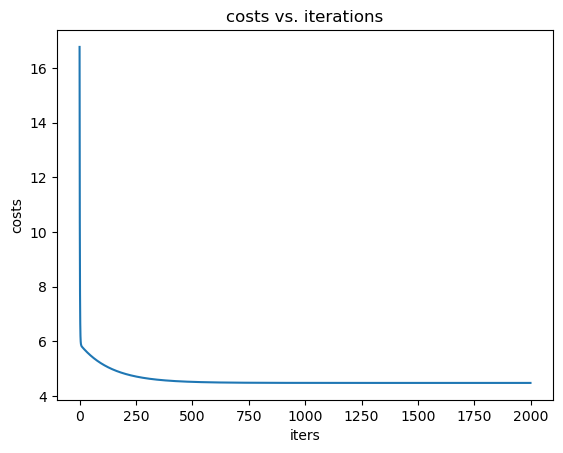

In [18]:
fig,ax = plt.subplots()
ax.plot(np.arange(iters),costs)
ax.set(xlabel = 'iters',
      ylabel = 'costs',
      title = 'costs vs. iterations')
plt.show()

### <font color='red'> 9. draw the linear regression line 


In [25]:
plt.close()

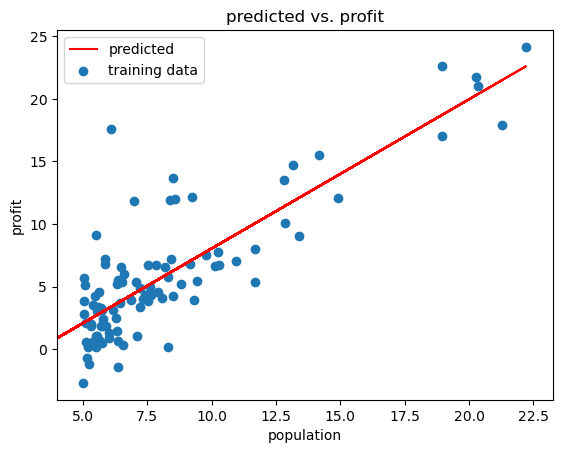

In [45]:
y_hat = theta[0,0] + theta[1,0] * x

fig,ax = plt.subplots()
ax.plot(x.flatten(),y_hat.flatten(),'r',label = 'predicted')
ax.scatter(data1.population,data1.profit,label = 'training data')
ax.set(xlabel = 'population',
      ylabel = 'profit',
      title = 'predicted vs. profit',
      xlim = 4)
ax.legend()
plt.show()

### <font color='red'> 10. use scikit-learn to perform the process


In [27]:
from sklearn import linear_model

In [28]:
model = linear_model.LinearRegression()

In [29]:
x = data1.iloc[:,0:-1]
x = x.values

In [30]:
y = data1.iloc[:,-1]
y = y.values.reshape(97,1)

In [31]:
model.fit(x,y)

LinearRegression()

In [32]:
f = model.predict(x).flatten()

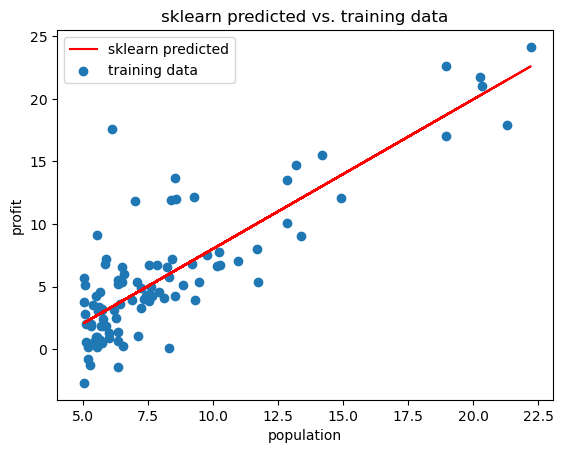

In [40]:
plt.close()
fig,ax1 = plt.subplots()
ax1.plot(x[:,1],f,'r',label='sklearn predicted')
ax1.scatter(data1.population,data1.profit,label = 'training data')
ax1.set_xlabel('population')
ax1.set_ylabel('profit')
ax1.set_title('sklearn predicted vs. training data')
ax1.set_xlim(left = 4)
ax1.legend()

plt.show()

### <font color='red'> 11. use normal equation to perform the process

In [46]:
def normal_equation(x,y):
    theta = np.linalg.inv(x.T @ x) @ x.T @ y
    return theta

In [47]:
theta_final = normal_equation(x,y)
theta_final

array([[-3.89578088],
       [ 1.19303364]])

### Multiple linear regression

1. load the dataset
2. feature rescaling
3. data visualization
4. cost function
5. compute cost of the data
6. batch gradient descent
7. set different alpha 
8. draw the plot of the cost function by iterations

### <font color='red'>1. load the dataset


In [49]:
path2 = 'ex1data2.txt'
data2 = pd.read_csv(path2,header= None,names = ['size','bedrooms','price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### <font color='red'> 2. feature rescaling


In [52]:
def normalize_feature(data):
    return (data - data.mean())/data.std()

In [54]:
data2 = normalize_feature(data2)

In [55]:
data2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### <font color='red'> 3. data visualization


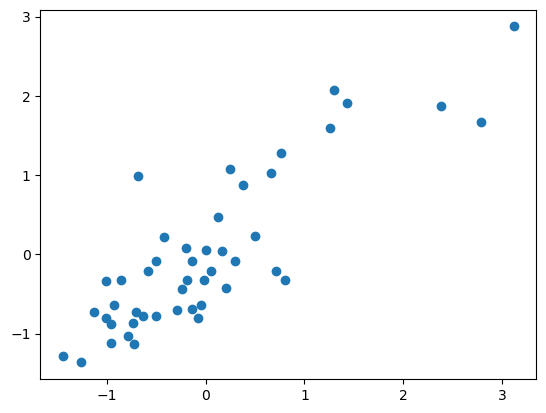

In [57]:
fig,ax = plt.subplots()
ax.scatter(data2['size'],data2['price'],label='size vs price')
plt.show()

In [58]:
plt.close()

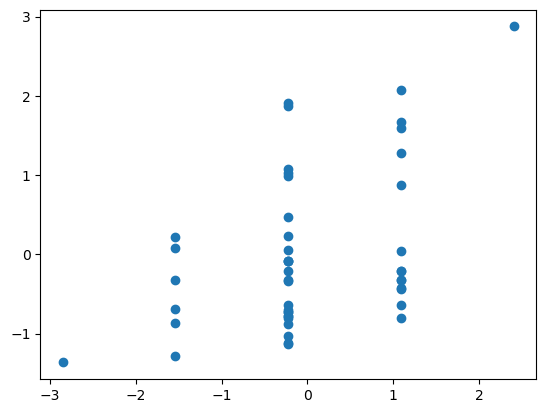

In [59]:
fig,ax = plt.subplots()
ax.scatter(data2['bedrooms'],data2['price'],label = 'bedrooms vs. price')
plt.show()

### <font color='red'> 4. cost function

In [60]:
data2.insert(0,'ones',1)
data2.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [61]:
x = data2.iloc[:,0:-1]
x = x.values
x.shape

(47, 3)

In [62]:
y = data2.iloc[:,-1]
y = y.values
y.shape

(47,)

In [63]:
y = y.reshape(47,1)
y.shape

(47, 1)

In [64]:
theta = np.zeros((3,1))

In [ ]:
print(theta)
theta.shape

### <font color='red'> 5. compute cost of the data


In [66]:
costs = costFunction(x,y,theta)

In [67]:
costs

0.48936170212765967

### <font color='red'> 6. batch gradient descent


In [73]:
def gradient_descent(x,y,theta,alpha,iters,isprint=False):
    costs = []
    for i in range(iters):
        theta = theta - alpha * x.T @ (x @ theta - y) / len(x)
        cost = costFunction(x,y,theta)
        costs.append(cost)

        if i % 100 == 0:
            if isprint:
                print(cost)
    return theta,costs

### <font color='red'> 7. set different alpha 


In [74]:
alpha_candidate = [0.1,0.01,0.001,0.0001,0.3,0.03,0.003,0.0003]
iters = 2000

### <font color='red'> 8. draw the plot of the cost function by iterations

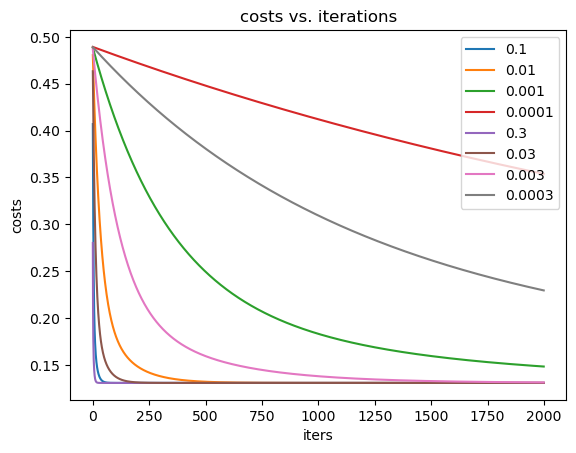

In [77]:
fig,ax = plt.subplots()
for alpha in alpha_candidate:
    _,costs = gradient_descent(x,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label = alpha)
    ax.legend()
    ax.set_xlabel('iters')
    ax.set_ylabel('costs')
    ax.set_title('costs vs. iterations')
plt.show()